<b style="font-size:30px">BrisT1D Blood Glucose Prediction Competition</b></br>
<t style="font-size:24px">Using historical blood glucose readings, insulin dosage, carbohydrate intake, and smartwatch activity data to predict future blood glucose.</t>

# Overview
Predicting blood glucose fluctuations is crucial for managing type 1 diabetes. Developing effective algorithms for this can alleviate some of the challenges faced by individuals with the condition.

# Description
## Type 1 Diabetes
Type 1 diabetes is a chronic condition in which the body no longer produces the hormone insulin and therefore cannot regulate the amount of glucose (sugar) in the bloodstream. Without careful management, this can be life-threatening and so those with the condition need to inject insulin to manage their blood glucose levels themselves. There are many different factors that impact blood glucose levels, including eating, physical activity, stress, illness, sleep, alcohol, and many more, so calculating how much insulin to give is complex. The continuous need to think about how an action may impact blood glucose levels and what to do to counteract it is a significant burden for those with type 1 diabetes.

An important part of type 1 diabetes management is working out how blood glucose levels are going to change in the future. Algorithms of varying levels of complexity have been developed that perform this prediction but the messy nature of health data and the numerous unmeasured factors mean there is a limit to how effective they can be. This competition aims to build on this work by challenging people to predict future blood glucose on a newly collected dataset.

## The Dataset
The data used in this competition is part of a newly collected dataset of real-world data collected from young adults in the UK who have type 1 diabetes. All participants used continuous glucose monitors, and insulin pumps and were given a smartwatch as part of the study to collect activity data. The complete dataset will be published after the competition for research purposes. Some more details about the study can be found in this blog post.

## Evaluation
Submissions are evaluated on Root Mean Square Error (RMSE) between the predicted blood glucose levels an hour into the future and the actual values that were then collected.

The RMSE value is calculated from the bg+1:00(future blood glucose) prediction values in the submission file against the true future blood glucose values. The RMSE values for the public and private leaderboards are calculated from unknown and non-overlapping samples from the submission file across all of the participants.

## Submission File
For each ID in the test set, you must predict a blood glucose value an hour into the future. The file should contain a header and have the following format:

```csv
id,bg+1:00
p01_0,6.3
p01_1,6.3
p01_2,6.3
etc.
```

# Dataset Description
The dataset is from a study that collected data from young adults in the UK with type 1 diabetes, who used a continuous glucose monitor (CGM), an insulin pump and a smartwatch. These devices collected blood glucose readings, insulin dosage, carbohydrate intake, and activity data. The data collected was aggregated to five-minute intervals and formatted into samples. Each sample represents a point in time and includes the aggregated five-minute intervals from the previous six hours. The aim is to predict the blood glucose reading an hour into the future, for each of these samples.

The training set takes samples from the first three months of study data from nine of the participants and includes the future blood glucose value. These training samples appear in chronological order and overlap. The testing set takes samples from the remainder of the study period from fifteen of the participants (so unseen participants appear in the testing set). These testing samples do not overlap and are in a random order to avoid data leakage.

## Complexities to be aware of:

this is medical data so there are missing values and noise in the data
the participants did not all use the same device models (CGM, insulin pump and smartwatch) so there may be differences in the collection method of the data
some participants in the test set do not appear in the training set

### Files:
- `activities.txt` - a list of activity names that appear in the activity-X:XX columns
- `sample_submission.csv` - a sample submission file in the correct format
- `test.csv` - the test set
- `train.csv` - the training set

### Columns in the dataset
- `train.csv`
- `id` - row id consisting of participant number and a count for that participant
- `p_num` - participant number
- `time` - time of day in the format HH:MM:SS
- `bg-X:XX` - blood glucose reading in mmol/L, X:XX(H:MM) time in the past (e.g. bg-2:35, would be the blood glucose reading from 2 hours and 35 minutes before the time value for that row), recorded by the continuous glucose monitor
- `insulin-X:XX` - total insulin dose received in units in the last 5 minutes, X:XX(H:MM) time in the past (e.g. insulin-2:35, would be the total insulin dose received between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the insulin pump
- `carbs-X:XX` - total carbohydrate value consumed in grammes in the last 5 minutes, X:XX(H:MM) time in the past (e.g. carbs-2:35, would be the total carbohydrate value consumed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the participant
- `hr-X:XX` - mean heart rate in beats per minute in the last 5 minutes, X:XX(H:MM) time in the past (e.g. hr-2:35, would be the mean heart rate between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
- `steps-X:XX` - total steps walked in the last 5 minutes, X:XX(H:MM) time in the past (e.g. steps-2:35, would be the total steps walked between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), recorded by the smartwatch
- `cals-X:XX` - total calories burnt in the last 5 minutes, X:XX(H:MM) time in the past (e.g. cals-2:35, would be the total calories burned between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), calculated by the smartwatch
- `activity-X:XX` - self-declared activity performed in the last 5 minutes, X:XX(H:MM) time in the past (e.g. activity-2:35, would show a string name of the activity performed between 2 hours and 40 minutes and 2 hours and 35 minutes before the time value for that row), set on the smartwatch
- `bg+1:00` - blood glucose reading in mmol/L an hour in the future, this is the value you will be predicting (not provided in test.csv)

# Data cleaning and dimensionality reduction

## a) loading `train.csv` from dataset

In [30]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import os
import json


In [31]:

df = pd.read_csv("dataset/train.csv")


/tmp/ipykernel_26074/1032061791.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("dataset/train.csv")


## b) Extract only the time from the time column

In [32]:
df_edited = df.copy()

df_edited["time"] = pd.to_datetime(df["time"], format='%H:%M:%S')
df_edited["time"] = df_edited["time"].dt.time

df_edited.head()


,id,p_num,time,bg-5:55,bg-5:50,bg-5:45,bg-5:40,bg-5:35,bg-5:30,bg-5:25,...,activity-0:40,activity-0:35,activity-0:30,activity-0:25,activity-0:20,activity-0:15,activity-0:10,activity-0:05,activity-0:00,bg+1:00
0,p01_0,p01,06:10:00,NaN,NaN,9.6,NaN,NaN,9.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.4
1,p01_1,p01,06:25:00,NaN,NaN,9.7,NaN,NaN,9.2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.8
2,p01_2,p01,06:40:00,NaN,NaN,9.2,NaN,NaN,8.7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15.5
3,p01_3,p01,06:55:00,NaN,NaN,8.7,NaN,NaN,8.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14.8
4,p01_4,p01,07:10:00,NaN,NaN,8.4,NaN,NaN,8.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.7


## c) Computing the day for each person 

- The day must be known, otherwhise the data would be cyclic (some other approach can be taken, such as converting the time into a polar/cyclic variable such as an angle)
- The ID contains the patient identifier and the id of the row: `p{patient_id}{measurement_id}`
- We need to account for when noon is passed (finding the moment when the `hour[i-1] > hour[i]` (past noon); then adding one day)
- The competition opened on 18th September 2024, so we're gona take that as starting date (due to lack of any definition)

In [33]:

# Calculate day column based on hours and patient ID
df_day = df_edited.groupby('p_num')['time'].apply(lambda x: (x < x.shift(1)).cumsum())

# Select third column from df_day
df_edited["day"] = df_day.reset_index(level=0, drop=True)

# Convert time to datetime by combining with base date and adding days
df_edited['date'] = pd.to_datetime('2000-09-18') + pd.to_timedelta(df_edited['day'], unit='D')
df_edited['datetime'] = pd.to_datetime(df_edited['date'].astype(str) + ' ' + df_edited['time'].astype(str))
df_edited["time"] = df_edited["datetime"]
df_edited = df_edited.drop(columns=['date', 'datetime', "day"])

c)  Map the p_num column to numeric values

In [34]:

# Create a dictionary to map patient strings to numeric IDs
patient_map = {}
counter = 0

def convert_patient_id(p_num):
    # If patient not seen before, assign new numeric ID
    if p_num not in patient_map:
        global counter
        patient_map[p_num] = counter
        counter += 1
    return patient_map[p_num]

# Convert p_num column to numeric IDs
df_edited['p_num'] = df_edited['p_num'].apply(lambda x: convert_patient_id(x))

In [35]:
def convert_measure_id(m_id):
    return int(str(m_id).split("_")[-1])

df_edited['m_num'] = df_edited['id'].apply(lambda x: convert_measure_id(x))

## e) Remove "repeated data columns"
Remove all columns containing data from "*some time ago*", which is, effectively repeated data, and convert them into one column per concept


### e1) One column per current **BACKGROUND GLUCOSE**:
- Exploring the `bg-0:00` column reveals there are missing values. 
- Since the readings have actually been taken with a 15min interval, we can fill most of those gaps with the `bg-0:05` and `bg-0:05` column (*we assume those misbehaviors are due to the rounding when calculating "how long ago the measures are from" for making the dataset*)
- There are also missing values for periods of time where - we assume - the patient's device lost tracking of the sensor, those will have to be filled by interpolation

In [36]:

# Function to fill NaN values in bg-0:00 with values from bg-0:05 or bg-0:10
df_edited['bg'] = df_edited[['bg-0:00', 'bg-0:05', 'bg-0:10']].bfill(axis=1).iloc[:, 0]
df_edited.drop(columns=[col for col in df.columns if 'bg-' in col.lower()], inplace=True)

# Interpolate the still missing values
df_edited["bg"].interpolate(method='linear', limit_direction='forward', inplace=True)

/tmp/ipykernel_26074/3916135833.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_edited["bg"].interpolate(method='linear', limit_direction='forward', inplace=True)


### e2) From the **INSULINE** rows, we'll only keep the insuline-0:00 column, reporting current insuline dose given by the pump

In [37]:
df_edited["insulin"] = df_edited["insulin-0:00"].fillna(0.0)
df_edited.drop(columns=[col for col in df_edited.columns if col.startswith("insulin-")], axis=1, inplace=True)

### e3) For the **CARBS**, we'll do the same as for the blood glucose.
- We will solve the missing data by replacing the ingestion with 0
- Then, we will apply a small window filter to the signal

In [38]:
# Function to fill NaN values in bg-0:00 with values from bg-0:05 or bg-0:10
df_edited['carbs'] = df_edited[['carbs-0:00', 'carbs-0:05', 'carbs-0:10']].bfill(axis=1).iloc[:, 0].fillna(0.0).rolling(3).mean()
df_edited.drop(columns=[col for col in df_edited.columns if 'carbs-' in col.lower()], inplace=True)

### e4) We'll only keep the current measure for **HEART-RATE** (although some patients didn't monitor that)

In [39]:
df_edited["hr"] = df_edited["hr-0:00"].fillna(0.0)
df_edited.drop(columns=[col for col in df_edited.columns if col.startswith("hr-")], axis=1, inplace=True)

### e5) Since the **STEPS** are additive, and they are measured every $5s$, we will make a steps column by adding the columns reporting the last $15min$
- We will also resolve missing data by replacing it with $0 steps$

In [40]:
# Function to fill NaN values in bg-0:00 with values from bg-0:05 or bg-0:10
df_edited['steps'] = df_edited[['steps-0:00', 'steps-0:05', 'steps-0:10']].sum(axis=1)
df_edited.drop(columns=[col for col in df_edited.columns if 'steps-' in col.lower()], inplace=True)

### e6) **CALORIES** are, probably, derived from the steps information, so we will apply the same process as for said steps
- Finally, the calories from here are added to the previously calculated "exercice" column 

In [41]:
# Function to fill NaN values in bg-0:00 with values from bg-0:05 or bg-0:10
df_edited['cals'] = df_edited[['cals-0:00', 'cals-0:05', 'cals-0:10']].sum(axis=1)
df_edited.drop(columns=[col for col in df_edited.columns if 'cals-' in col.lower()], inplace=True)


## d) Accounting for the **activities**

- Make a dictionary for all the available activities: The objective here is combining the activities into a single column. For that:
  - We'll estimate a calory consumption for each present activity
  - We will make a column for each of those activities, containing a $1$ if the activity is present for the moment of the reading, ore a $0$ if not
  - Multiply each column by its activity's caloric consumption
  - Sum the activity columns and the calory column to obtain a global calory consumption for each period in time

### d1) Getting a list of all the present activities

Unique activities = dict_keys(['Walk', 'Run', 'Walking', 'Sport', 'Outdoor Bike', 'Swim', 'Aerobic Workout', 'Hike', 'Dancing', 'HIIT', 'Workout', 'Running', 'Yoga', 'Indoor climbing', 'Zumba', 'Swimming', 'Bike', 'Weights', 'Strength training', 'Tennis', 'Spinning', 'Stairclimber'])


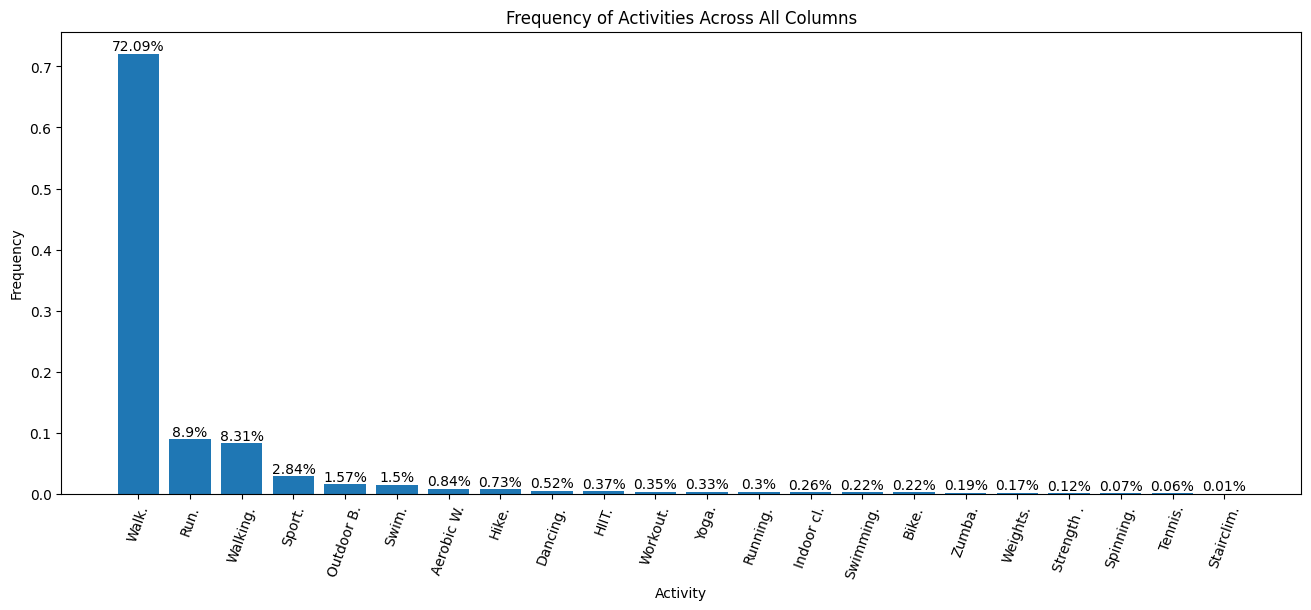

In [42]:
# Get the columns for the activities
activity_cols = [col for col in df.columns if 'activity' in col.lower()]
activity_df = df_edited[activity_cols]

# Calculate frequencies for each activity across all columns
activity_frequencies = {}
for col in activity_df.columns:
    value_counts = activity_df[col].value_counts()
    for value, count in value_counts.items():
        if value in activity_frequencies:
            activity_frequencies[value] += count
        else:
            activity_frequencies[value] = count

print(f"Unique activities = {activity_frequencies.keys()}")

# save activities to json for later processing
if not os.path.exists('dataset/processed'):
    os.makedirs("dataset/processed")
with open('dataset/processed/activities_freq.json', 'w') as f:
    f.write(json.dumps(activity_frequencies))

totalActivityEntries = sum(activity_frequencies.values())
for activity, frequency in activity_frequencies.items():
    activity_frequencies[activity] = frequency / totalActivityEntries

# Convert to sorted dictionary for better readability
sorted_frequencies = dict(sorted(activity_frequencies.items(), key=lambda x: x[1], reverse=True))

# Print frequencies
plt.figure(figsize=(16, 6))
bars = plt.bar([f"{name[:9]}." for name in sorted_frequencies.keys()], sorted_frequencies.values())
plt.ylabel("Frequency")
plt.xlabel("Activity")
plt.xticks(rotation=70)
plt.title("Frequency of Activities Across All Columns")

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{round(float(height)*100, 2)}%',
             ha='center', va='bottom')

plt.show()


### d2) Now that we have a dictionary of all present sports, we can associate a calory consumption per period to every exercice.
- The data for ellaborating this dictionary has been taken from [health.harvard.edu](https://www.health.harvard.edu/diet-and-weight-loss/calories-burned-in-30-minutes-for-people-of-three-different-weights)
- The data there is per 30-minute exercice so the values on that table will be divided by 2 since our periods are 15-minute long
- The weight considered will be the closest to the average weight in the population $155lb = 70kg \approx 65kg(average)$

> Here is a table of what exercices have been considered equivalents between the dataset and the Harvard table:
> | Our dataset | Harvard Table | Value (kCal/15min) |
> |---|---|---|
> | Walk | Walking: 4 mph (15 min/mi) | 87.5 |
> | Walking | Walking: 4 mph (15 min/mi) | 87.5 |
> | Run | Running: 6 mph (10 min/mile) | 180 |
> | Running | Running: 6 mph (10 min/mile) | 180 |
> | Sport | A common value in the "Sports" table | 120 |
> | Bike | Bicycling: BMX or mountain | 180 |
> | Outdoor Bike | Bicycling: BMX or mountain | 180 |
> | Swim | Swimming: general | 108 |
> | Swimming | Swimming: general | 108 |
> | Aerobic Workout | Aerobics: low impact | 99 |
> | Hike | Hiking: cross-country | 108 |
> | HIIT | Aerobics, Step: high impact | 180 |
> | Workout | Weight Lifting: general | 54 |
> | Weights | Weight Lifting: general | 54 |
> | Strength training | Weight Lifting: general | 54 |
> | Yoga | Stretching, Hatha Yoga | 36 |
> | Indoor climbing | Rock Climbing: ascending | 140.5 |
> | Zumba | Dancing: Fast, ballet, twist | 108 |
> | Tennis | Tennis: General | 126 |
> | Spinning | Bicycling, Stationary: moderate | 126 |
> | StairClimbing | Stair Step Machine: general | 108 |
> 

- Focusing only on the last column `activity-00` (measurements contemporary to the datetime value)
- Making a column for each physical activity, with a rolling mean indicating the peaks of activity

In [43]:
# Making a dataframe containing a new column for each one of the 10 most commons activities, 
# which will contain a 1 for the rows in which the activity is present, and a 0 for the rows in 
# which the activity is not present.

# Load calory consumption table
caloryConsumption_perActivity: dict = json.loads(open("dataset/processed/activities_calory_consumption.json", "r").read())

current_activity = df_edited['activity-0:00']

df_edited.drop(columns=activity_cols)
df_edited["activity_current"] = current_activity


In [44]:

# Create new binary columns for each activity (first 5 more frequent)
for activity in sorted_frequencies.keys():
    df_edited[f'activity_{activity}'] = df_edited['activity_current'].apply(lambda x: 1 if x == activity else 0)
    # apply a rolling mean
    df_edited[f'activity_{activity}'] = df_edited[f'activity_{activity}'].rolling(window=3).mean()*caloryConsumption_perActivity.get(activity, 0)


In [45]:

df_edited["cals"] = df_edited[[f"activity_{act}" for act in sorted_frequencies.keys()] + ["cals"]].sum(axis=1)

# Drop all activity related columns
df_edited.drop(columns=[col for col in df_edited.columns if 'activity' in col.lower()], inplace=True)


### f) Save the processed dataset to csv

In [46]:
df_edited.fillna(0.0, inplace=True)
df_edited.head(5) #to show first 5 rows of the dataset

,id,p_num,time,bg+1:00,m_num,bg,insulin,carbs,hr,steps,cals
0,p01_0,0,2000-09-18 06:10:00,13.4,0,15.1,0.0417,0.0,0.0,0.0,0.0
1,p01_1,0,2000-09-18 06:25:00,12.8,1,14.4,0.0417,0.0,0.0,0.0,0.0
2,p01_2,0,2000-09-18 06:40:00,15.5,2,13.9,0.0417,0.0,0.0,0.0,0.0
3,p01_3,0,2000-09-18 06:55:00,14.8,3,13.8,0.0417,0.0,0.0,0.0,0.0
4,p01_4,0,2000-09-18 07:10:00,12.7,4,13.4,0.0417,0.0,0.0,0.0,0.0


In [47]:
if not os.path.exists("dataset/processed"):
    os.makedirs("dataset/processed")
df_edited[["id", "m_num", "p_num", "time", "bg", "carbs", "insulin", "cals", "steps", "hr", "bg+1:00"]].fillna(0.0).to_csv("dataset/processed/train.csv")

In [48]:
df_edited.head(5) #to show first 5 rows of the dataset

,id,p_num,time,bg+1:00,m_num,bg,insulin,carbs,hr,steps,cals
0,p01_0,0,2000-09-18 06:10:00,13.4,0,15.1,0.0417,0.0,0.0,0.0,0.0
1,p01_1,0,2000-09-18 06:25:00,12.8,1,14.4,0.0417,0.0,0.0,0.0,0.0
2,p01_2,0,2000-09-18 06:40:00,15.5,2,13.9,0.0417,0.0,0.0,0.0,0.0
3,p01_3,0,2000-09-18 06:55:00,14.8,3,13.8,0.0417,0.0,0.0,0.0,0.0
4,p01_4,0,2000-09-18 07:10:00,12.7,4,13.4,0.0417,0.0,0.0,0.0,0.0


### Save on csv per patient

In [49]:
perPatient = df_edited.groupby(by="p_num")

if not os.path.exists("dataset/processed/patients"):
    os.makedirs("dataset/processed/patients")

for patient in perPatient:
    patient[1][["id", "m_num", "p_num", "time", "bg", "carbs", "insulin", "cals", "steps", "hr", "bg+1:00"]].fillna(0.0).\
        to_csv("dataset/processed/patients/patient" + str(patient[0]) + ".csv", index=False)